# Modelo Projeto de Data Science Classificação - Avançado

Este é um python notebook desenvolvido por Nícolas Mikio com o objetivo de ensinar as pessoas a desenvolverem projetos de data science.

Utilizei a base "Heart Disease UCI" para desenvolver modelos a fim de resolver um problema de classificação.

## Conteúdo

Avançado - Classificação
- Tratamento dos Dados
- Resampling
- Regressão Logística (com RFE)
- Regression Tree
- Random Forest
- XGboost
- Validação com Cross-Validation
- Grid Search e Random Search
- Validação treino e teste (ROC e AUC, matriz de confusão, acurácia, etc.)

## Base de Dados

303 rows × 14 columns

- age
- sex
- chest pain type (4 values)
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
- resting blood pressure (in mm Hg on admission to the hospital)
- serum cholestoral (in mg/dl)
- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- resting electrocardiographic results (values 0,1,2)
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach = maximum heart rate achieved 
- exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
- ca: number of major vessels (0-3) colored
- thal: 
-- 3 = normal; 
-- 6 = fixed defect; 
-- 7 = reversable defect
- target: 1 or 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("dark_background")
sns.set()

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
print("A proporção target==1 sobre o total é", round(len(df[df["target"]==1])/len(df)*100,2), "%")

A proporção target==1 sobre o total é 54.46 %


### Matriz de Correlação

Por quê não usar o pd.corr?

R: Ele calcula a correlação de pearson ou spearman (postos), logo não pode ser usada para correlacionar variáveis qualitativas.

Vamos usar outro recurso.

dython: nominal.associations

Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features using: 
- Pearson's R for continuous-continuous cases 
- Correlation Ratio for categorical-continuous cases 
- Cramer's V or Theil's U for categorical-categorical cases

In [6]:
from dython import nominal

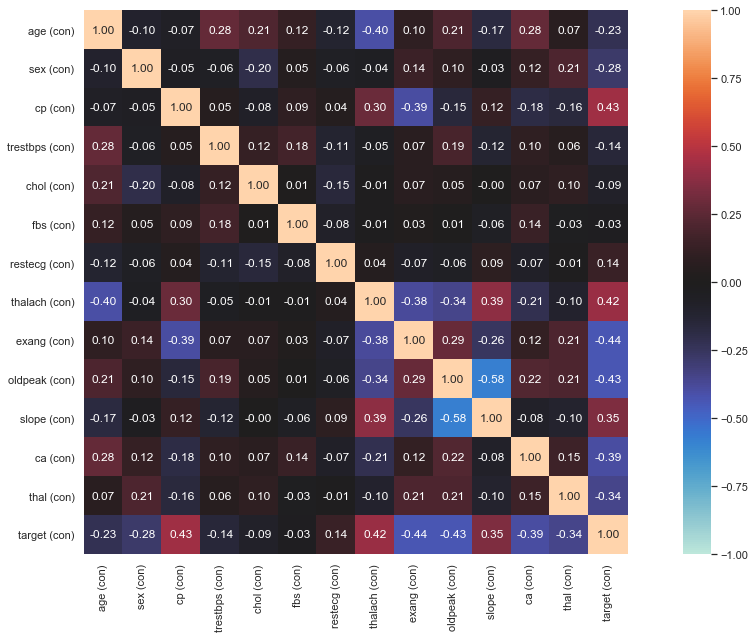

In [7]:
nominal.associations(df, figsize=(20,10),mark_columns=True); # Ponto e virgula faz printar só a matriz

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df_quali = df.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

In [10]:
df_teste = df.copy()
for i in df_quali:
    df_teste[i] = df_teste[i].astype(str)

In [11]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


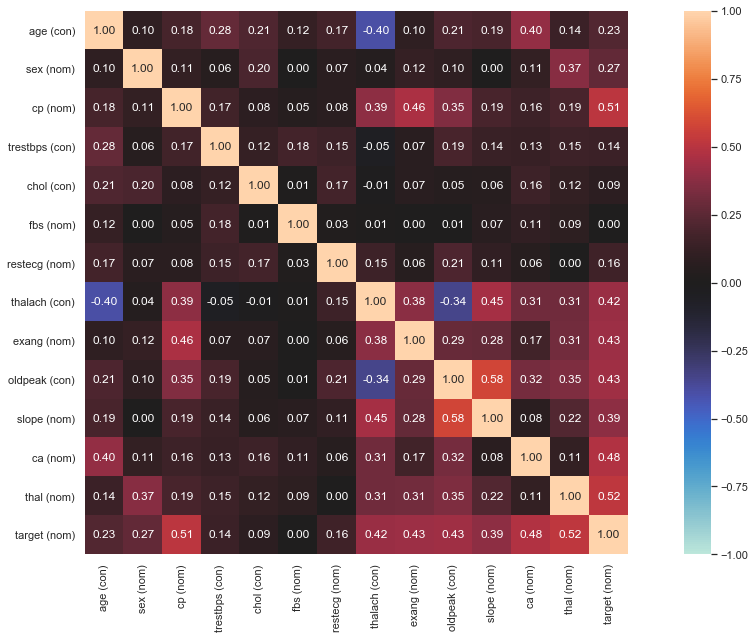

In [12]:
nominal.associations(df_teste, figsize=(20,10),mark_columns=True); # Ponto e virgula faz printar só a matriz
# mostra as variáveis contínuas e nominais (que classificamos)

## Estudo das variáveis qualitativas

In [13]:
df_quali

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


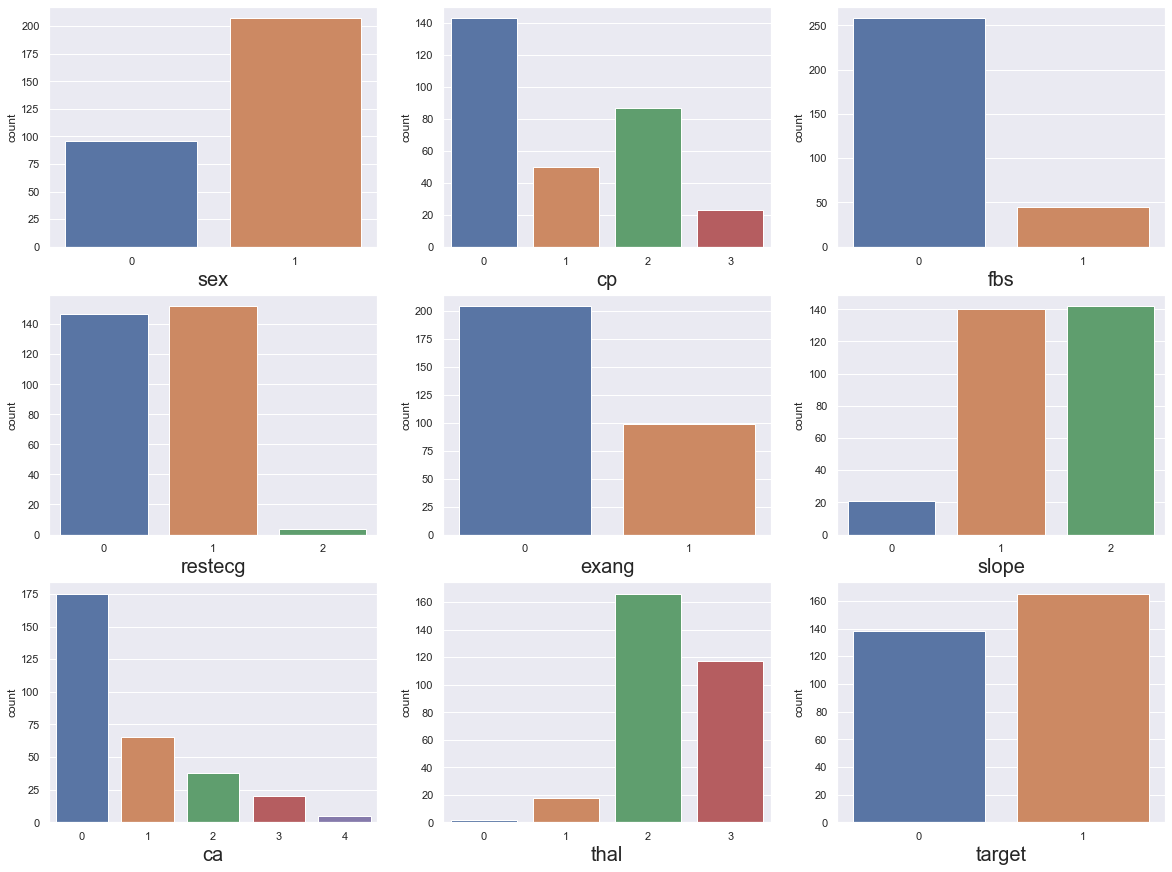

In [14]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df_quali:
    if plotnumber <= len (df_quali.columns):
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=df_quali[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
for i in df_quali.columns: #poderia não ter o ".columns", já que o for em um dataframe já pega as colunas
    print(df_quali['%s' %(i)].value_counts())
    print('')

1    207
0     96
Name: sex, dtype: int64

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

0    258
1     45
Name: fbs, dtype: int64

1    152
0    147
2      4
Name: restecg, dtype: int64

0    204
1     99
Name: exang, dtype: int64

2    142
1    140
0     21
Name: slope, dtype: int64

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

1    165
0    138
Name: target, dtype: int64



In [16]:
import researchpy as rp

In [17]:
# Cross Table e Teste Qui-Quadrado
for i in df_quali.columns:
    table, results = rp.crosstab(df_quali[i], df_quali['target'], prop= 'row', test= 'chi-square')
    print (table)
    print('')
    print (results)
    print('')
    print('------------------------------------')
    print('')

       target              
target      0      1    All
sex                        
0       25.00  75.00  100.0
1       55.07  44.93  100.0
All     45.54  54.46  100.0

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   23.9144
1                    p-value =    0.0000
2               Cramer's phi =    0.2809

------------------------------------

       target              
target      0      1    All
cp                         
0       72.73  27.27  100.0
1       18.00  82.00  100.0
2       20.69  79.31  100.0
3       30.43  69.57  100.0
All     45.54  54.46  100.0

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   81.6864
1                    p-value =    0.0000
2                 Cramer's V =    0.5192

------------------------------------

       target              
target      0      1    All
fbs                        
0       44.96  55.04  100.0
1       48.89  51.11  100.0
All     45.54  54.46  100.0

                Chi-square test

## Estudo das variáveis quantitativas

In [18]:
df_quant = df.loc[:, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']] # .loc[LINHAS ; COLUNAS]
df_quant

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


In [19]:
df_quant.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


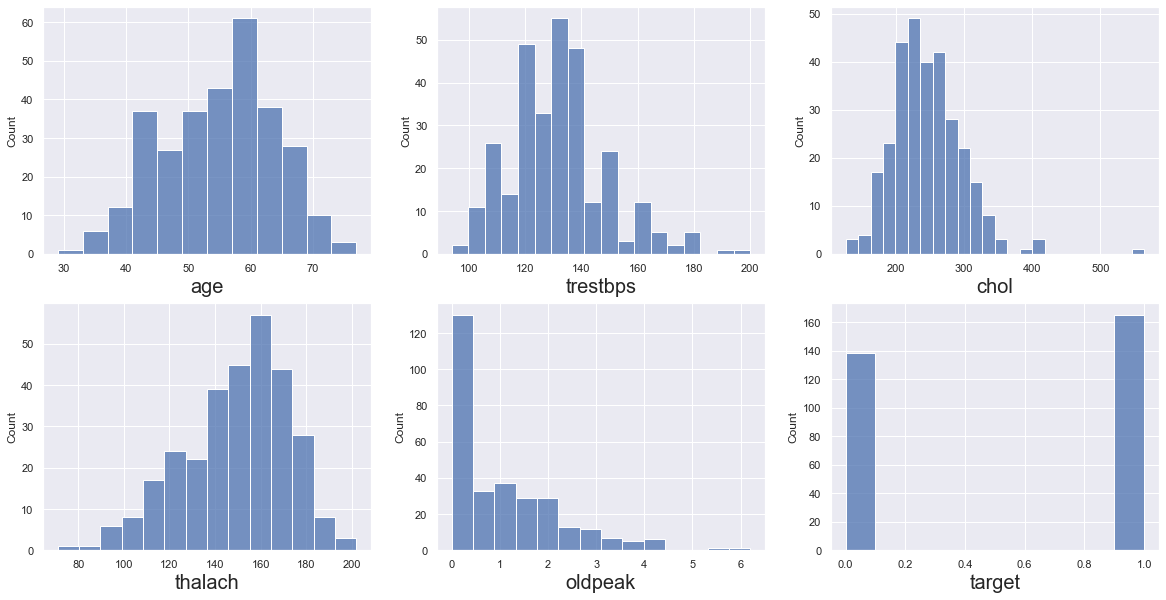

In [20]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df_quant:
    if plotnumber <= len (df_quant.columns):
        ax=plt.subplot(2,3,plotnumber)
        sns.histplot(x=df_quant[column], data = df_quant)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

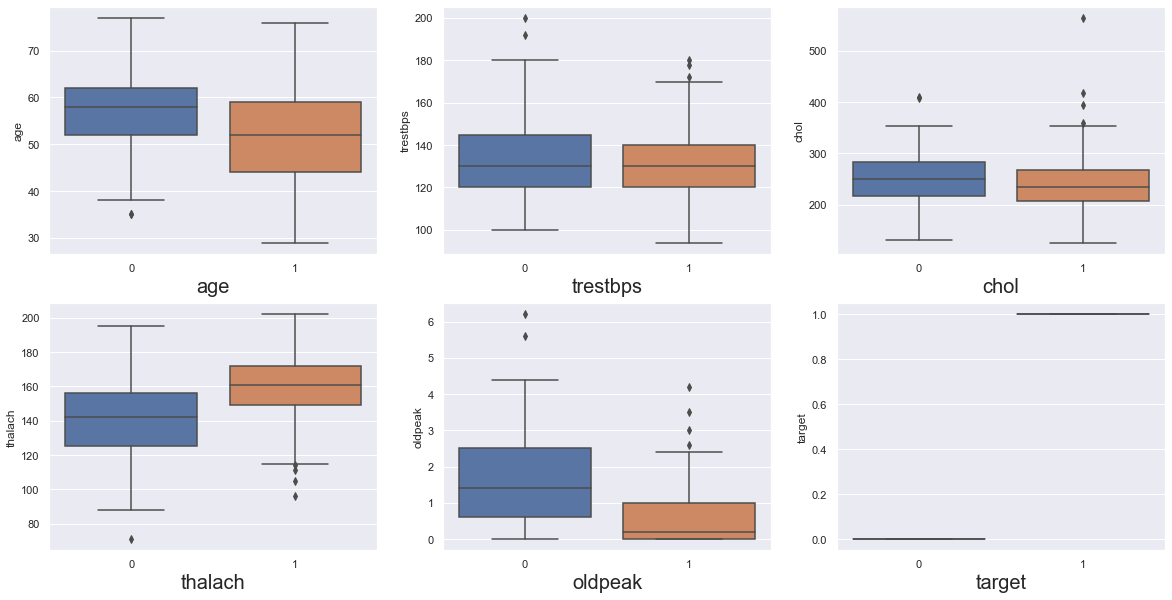

In [21]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df_quant:
    if plotnumber <= len (df_quant.columns):
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(y=df_quant[column], x=df_quant['target'], data = df_quant)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Modelagem

## Regressão Logística

### Gerar as Dummies (do português dos bares "dummieficar")

In [22]:
df_quali = df_quali.drop(columns=['target'])
df_quali

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


In [23]:
df_lr = df.copy()

In [24]:
for column in df_quali:
    df_lr[column] = df_lr[column].astype(str)

In [25]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [26]:
df_lr = pd.get_dummies(df_lr)
df_lr #quantitativas não são alteradas e as qualitativas são quebradas em classes e viram colunas

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
y = df_lr.loc[:, 'target']
X = df_lr.drop(columns='target')

In [28]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


### Sampling

Amostrar os dados da base df em treino e teste. Também separar a base entre "X" conjunto de variáveis dependentes e "y" a variável dependente (target)

In [29]:
# Separar a base em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Treinando Modelo

In [30]:
# Importar Lib
from sklearn.linear_model import LogisticRegression

In [31]:
# Usei max_iter = 1000 pois o default de máximos 100 interações não eram suficientes para o algorítmo convergir
logit = LogisticRegression(random_state=0, max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Selecionando variáveis (Feature Selection) usando RFE

RFE é uma técnica de seleção de variáveis que rankeia as melhores variáveis do modelo.

Pode ser lido com mais detalhes nesse site:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [32]:
# Importar Lib
from sklearn.feature_selection import RFE

In [33]:
# Seleção de Variáveis 
rfe = RFE(logit, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

# Resumo dos melhores atributos
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False False False  True  True  True  True False  True  True False
 False False False False False  True False  True False  True  True  True
  True  True False False  True  True]
[13 14 16 12  1  1  1  1 11  1  1 10  6 15  5  3  2  1  8  1  4  1  1  1
  1  1  7  9  1  1]


Index(['oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_2', 'cp_3', 'exang_1',
       'slope_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_2', 'thal_3'],
      dtype='object')

In [34]:
logit = LogisticRegression(random_state=0, max_iter=1000)
X_train_RFE = X_train[X_train.columns[rfe.support_]]
logit_RFE = logit.fit(X_train_RFE, y_train)

### Validação do Modelo

In [35]:
X_test_RFE = X_test[X_train.columns[rfe.support_]]
y_pred = logit_RFE.predict(X_test_RFE)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [36]:
y_predproba = logit_RFE.predict_proba(X_test_RFE)
y_predproba # probabilidade de ser 0 ou 1

array([[0.87187127, 0.12812873],
       [0.31392324, 0.68607676],
       [0.27116141, 0.72883859],
       [0.98928098, 0.01071902],
       [0.91978584, 0.08021416],
       [0.72423335, 0.27576665],
       [0.914779  , 0.085221  ],
       [0.9596434 , 0.0403566 ],
       [0.96576233, 0.03423767],
       [0.98060747, 0.01939253],
       [0.54089275, 0.45910725],
       [0.05982452, 0.94017548],
       [0.98002206, 0.01997794],
       [0.09290202, 0.90709798],
       [0.05847542, 0.94152458],
       [0.25071853, 0.74928147],
       [0.91773474, 0.08226526],
       [0.23924544, 0.76075456],
       [0.98561141, 0.01438859],
       [0.22038103, 0.77961897],
       [0.18307429, 0.81692571],
       [0.79044806, 0.20955194],
       [0.88849033, 0.11150967],
       [0.83757031, 0.16242969],
       [0.06984644, 0.93015356],
       [0.54695095, 0.45304905],
       [0.91795242, 0.08204758],
       [0.58772233, 0.41227767],
       [0.02642969, 0.97357031],
       [0.3923305 , 0.6076695 ],
       [0.

In [37]:
y_predproba = pd.DataFrame(y_predproba)
y_predproba

,0,1
0,0.871871,0.128129
1,0.313923,0.686077
2,0.271161,0.728839
3,0.989281,0.010719
4,0.919786,0.080214
...,...,...
71,0.042547,0.957453
72,0.069846,0.930154
73,0.970415,0.029585
74,0.915650,0.084350


### Curva ROC

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

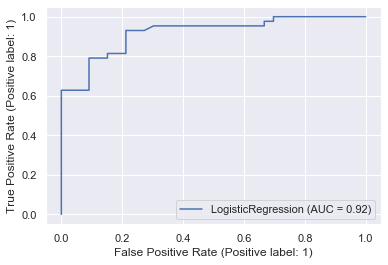

In [39]:
# fig = plt.figure()
plot_roc_curve(logit, X_test_RFE, y_test)
# plt.show()

Confusion matrix:
 [[26  7]
 [ 5 38]]


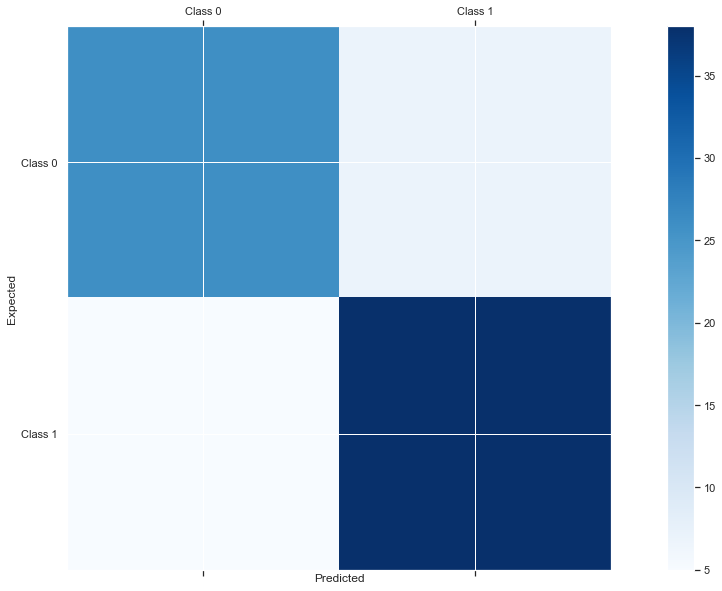

In [40]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 84.21%
Recall: 88.37%


### Gráfico para seleção de Ponto de Corte

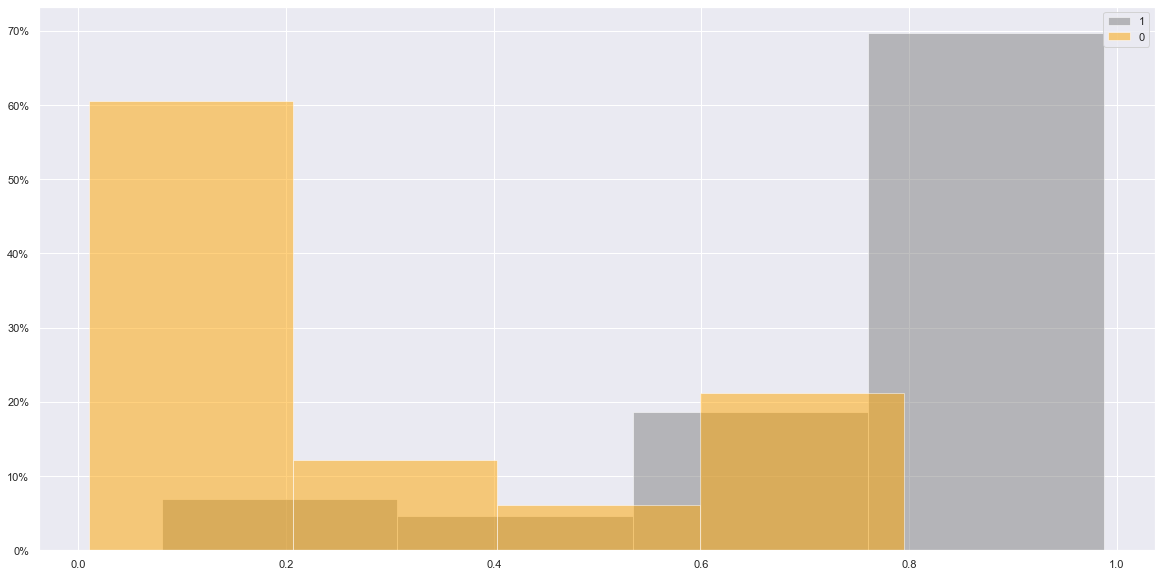

In [42]:
y_predproba['Target'] = y_test.array
um = y_predproba[y_predproba["Target"]==1][1]
zero = y_predproba[y_predproba["Target"]==0][1]

import matplotlib.ticker as mtick
plt.figure(figsize=(20,10))
plt.hist(um, color="gray", bins = 4, alpha=0.5, label='1', weights=np.ones(len(um)) / len(um))
plt.hist(zero, color="orange", bins =4, alpha=0.5, label='0', weights=np.ones(len(zero)) / len(zero))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend(loc='upper right')
plt.show()

---

## Tratando os dados antes de rodar o Boosting

Quando usar one hot encoding, get dummies, labelencoder ou outra técnica para tratar variáveis categóricas?

Para algoriitmos de árvores:
- se a variável é qualitativa nominal, get dummies ou one hot encoding com label enconder (recomendado);
- se a variável é qualitativa ordinal, use somente label encoder. 

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
df_one = df.copy()

#colunas quali ordinais
cols = ['cp', 'restecg', 'slope', 'thal']

# tratamento one hot encoding (dummies)
encoder=OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_one[cols]))
df_encoded.columns = encoder.get_feature_names(cols)

# droppar e concatenar as novas variáveis
df_one.drop(cols ,axis=1, inplace=True)
df_one = pd.concat([df_one, df_encoded], axis=1)
df_one

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56,1,120,236,0,178,0,0.8,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,57,0,120,354,0,163,1,0.6,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
299,45,1,110,264,0,132,0,1.2,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
300,68,1,144,193,1,141,0,3.4,2,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,57,1,130,131,0,115,1,1.2,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
y = df_one.loc[:, 'target']
X = df_one.drop(columns='target')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
X_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
173,58,1,132,224,0,173,0,3.2,2,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
261,52,1,112,230,0,160,0,0.0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
37,54,1,150,232,0,165,0,1.6,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,59,1,178,270,0,145,0,4.2,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
166,67,1,120,229,0,129,1,2.6,2,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,132,247,1,143,1,0.1,4,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
192,54,1,120,188,0,113,0,1.4,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
117,56,1,120,193,0,162,0,1.9,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
47,47,1,138,257,0,156,0,0.0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
y_train

173    0
261    0
37     1
101    1
166    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 227, dtype: int64

## Gradient Boosting

Default parameters

max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

### Treinando o Modelo

In [49]:
# !pip install xgboost
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

Se for fazer separando a base em treino em teste use:

xgb.fit(X_train, y_train)

In [51]:
xgb.fit(X_train, y_train)

[17:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Grid Search

Fonte do Grid Search: https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning

Como irei modelar procurando os melhores hiperparametros, irei usar:

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X, y):
    param_tuning = {'max_depth': [3, 5, 6, 10, 15, 20],
                    'learning_rate': [0.01, 0.1, 0.2, 0.3],
                    'n_estimators': [100, 200, 500, 1000]}

    xgb_model = XGBClassifier(use_label_encoder=False)

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X,y)

    return gsearch.best_params_, gsearch.best_score_, gsearch.best_estimator_.feature_importances_

In [54]:
%%time
g = hyperParameterTuning(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[17:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 24s


In [55]:
# hiperparâmetros
g[0]

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [56]:
print ("acurácia:", g[1])

acurácia: 0.8248633879781421


Text(0.5, 1.0, 'Feature Importance')

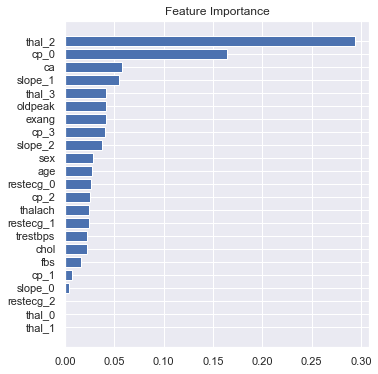

In [57]:
feature_importance = g[2]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

### Random Search

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X, y):
    param_tuning = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 200, 500, 1000]}

    xgb_model = XGBClassifier(use_label_encoder=False)

    rsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions = param_tuning,                        
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    rsearch.fit(X,y)

    return rsearch.best_params_, rsearch.best_score_, rsearch.best_estimator_.feature_importances_

In [60]:
%%time
r = hyperParameterTuning(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 15.6 s


In [61]:
# hiperparâmetros
r[0]

{'subsample': 0.7999999999999999,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.7999999999999999}

In [62]:
print ("acurácia:", r[1])

acurácia: 0.8380874316939891


Text(0.5, 1.0, 'Feature Importance')

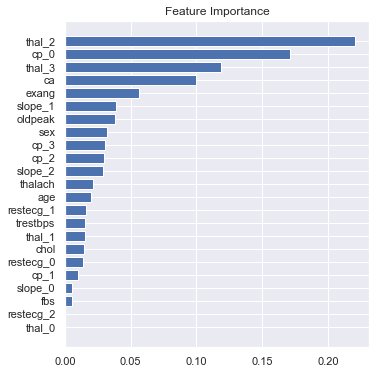

In [63]:
feature_importance = r[2]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

Default parameters

max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

---